In [108]:
#pip install --upgrade imbalanced-learn

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, recall_score
from imblearn.pipeline import Pipeline as imPipeline
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier, BalancedBaggingClassifier
import warnings
warnings.filterwarnings('ignore')


In [20]:
df = pd.read_csv('churn.csv')
pd.set_option('display.max_columns', None)
df

,id,cinsiyyət,Yaşlı təbəqə,tərəfdaş,asılı olanlar,müddəti,Telefon Xidməti,Birdən çox xətt,İnternet servisi,onlayn təhlükəsizlik,onlayn yedəkləmə,Cihazın Mühafizəsi,texniki dəstək,canli tv,filmlər,müqavilə,Kağızsız Hesablaşma,ödəniş metodu,Aylıq Ödənişlər,Ümumi ödənişlər,Churn,"TelefonXidməti,KağızsızHesablaşma"
0,7590-VHVEG,Qadın,0,Hə,Yox,1,Yox,Teleon xidmeti yoxdur,DSL,Yox,Hə,Yox,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.85,29.85,Yox,Yox Hə
1,5575-GNVDE,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,Yox,Hə,Yox,Yox,Yox,illik,Yox,mail cek,56.95,1889.5,Yox,Hə Yox
2,3668-QPYBK,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,Hə,Yox,Yox,Yox,Yox,ayliq,Hə,mail cek,53.85,108.15,Hə,Hə Hə
3,7795-CFOCW,Kişi,0,Yox,Yox,45,Yox,Teleon xidmeti yoxdur,DSL,Hə,Yox,Hə,Hə,Yox,Yox,illik,Yox,bank transfer,42.30,1840.75,Yox,Yox Yox
4,9237-HQITU,NaN,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,Yox,Yox,Yox,Yox,Yox,ayliq,Hə,elektronik cek,70.70,151.65,Hə,Hə Hə
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Kişi,0,Hə,Hə,24,Hə,Hə,DSL,Hə,Yox,Hə,Hə,Hə,Hə,illik,Hə,mail cek,84.80,1990.5,Yox,Hə Hə
7039,2234-XADUH,Qadın,0,Hə,Hə,72,Hə,Hə,Fiber optic,Yox,Hə,Hə,Yox,Hə,Hə,illik,Hə,kredit karti,103.20,7362.9,Yox,Hə Hə
7040,4801-JZAZL,Qadın,0,Hə,Hə,11,Yox,Teleon xidmeti yoxdur,DSL,Hə,Yox,Yox,Yox,Yox,Yox,ayliq,Hə,elektronik cek,29.60,346.45,Yox,Yox Hə
7041,8361-LTMKD,Kişi,1,Hə,Yox,4,Hə,Hə,Fiber optic,Yox,Yox,Yox,Yox,Yox,Yox,ayliq,Hə,mail cek,74.40,306.6,Hə,Hə Hə


In [21]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['id', 'cinsiyyət', 'yaşlı_təbəqə', 'tərəfdaş', 'asılı_olanlar',
       'müddəti', 'telefon_xidməti', 'birdən_çox_xətt', 'i̇nternet_servisi',
       'onlayn_təhlükəsizlik', 'onlayn_yedəkləmə', 'cihazın_mühafizəsi',
       'texniki_dəstək', 'canli_tv', 'filmlər', 'müqavilə',
       'kağızsız_hesablaşma', 'ödəniş_metodu', 'aylıq_ödənişlər',
       'ümumi_ödənişlər', 'churn', 'telefonxidməti,kağızsızhesablaşma'],
      dtype='object')

In [22]:
df.shape

(7043, 22)

In [23]:
df.describe()

,yaşlı_təbəqə,müddəti,aylıq_ödənişlər
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


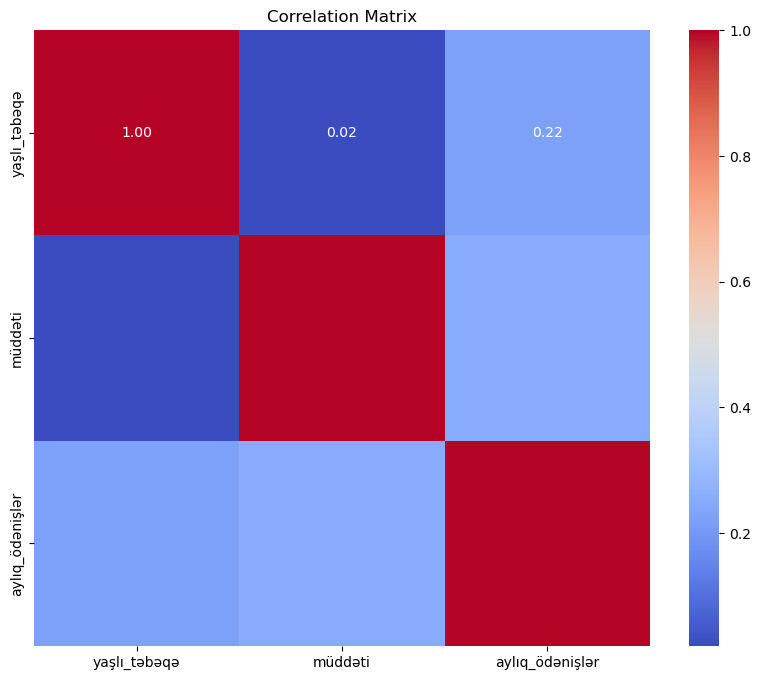

In [24]:
# correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True).round(2), annot = True, fmt = ".2f", cmap = 'coolwarm', square = True, cbar = True)
plt.title('Correlation Matrix')
plt.show()

#df.corr(numeric_only=True).round(2)

In [25]:
df.duplicated().sum()

0

In [26]:
df.isna().sum()

id                                     0
cinsiyyət                            100
yaşlı_təbəqə                           0
tərəfdaş                             100
asılı_olanlar                          0
müddəti                                0
telefon_xidməti                        0
birdən_çox_xətt                        0
i̇nternet_servisi                      0
onlayn_təhlükəsizlik                   0
onlayn_yedəkləmə                       0
cihazın_mühafizəsi                     0
texniki_dəstək                         0
canli_tv                               0
filmlər                                0
müqavilə                               0
kağızsız_hesablaşma                    0
ödəniş_metodu                          0
aylıq_ödənişlər                        0
ümumi_ödənişlər                        0
churn                                  0
telefonxidməti,kağızsızhesablaşma      0
dtype: int64

In [27]:
(df.isna().sum() / len(df)).round(3)

id                                   0.000
cinsiyyət                            0.014
yaşlı_təbəqə                         0.000
tərəfdaş                             0.014
asılı_olanlar                        0.000
müddəti                              0.000
telefon_xidməti                      0.000
birdən_çox_xətt                      0.000
i̇nternet_servisi                    0.000
onlayn_təhlükəsizlik                 0.000
onlayn_yedəkləmə                     0.000
cihazın_mühafizəsi                   0.000
texniki_dəstək                       0.000
canli_tv                             0.000
filmlər                              0.000
müqavilə                             0.000
kağızsız_hesablaşma                  0.000
ödəniş_metodu                        0.000
aylıq_ödənişlər                      0.000
ümumi_ödənişlər                      0.000
churn                                0.000
telefonxidməti,kağızsızhesablaşma    0.000
dtype: float64

In [28]:
# Ümumi ödənişlər sütununun type nı dəyişirik

df['ümumi_ödənişlər'] = pd.to_numeric(df['ümumi_ödənişlər'], errors = 'coerce')

df.isnull().sum()

id                                     0
cinsiyyət                            100
yaşlı_təbəqə                           0
tərəfdaş                             100
asılı_olanlar                          0
müddəti                                0
telefon_xidməti                        0
birdən_çox_xətt                        0
i̇nternet_servisi                      0
onlayn_təhlükəsizlik                   0
onlayn_yedəkləmə                       0
cihazın_mühafizəsi                     0
texniki_dəstək                         0
canli_tv                               0
filmlər                                0
müqavilə                               0
kağızsız_hesablaşma                    0
ödəniş_metodu                          0
aylıq_ödənişlər                        0
ümumi_ödənişlər                       11
churn                                  0
telefonxidməti,kağızsızhesablaşma      0
dtype: int64

In [29]:
# filling nan values by using imputer
from sklearn.impute import SimpleImputer

categorical_features = ['cinsiyyət', 'tərəfdaş']
numeric_features = ['ümumi_ödənişlər']

cat_imp = SimpleImputer(strategy = 'most_frequent')
num_imp = SimpleImputer(strategy = 'median')

df[categorical_features] = cat_imp.fit_transform(df[categorical_features])
df[numeric_features] = num_imp.fit_transform(df[numeric_features])

In [30]:
df.isnull().sum()

id                                   0
cinsiyyət                            0
yaşlı_təbəqə                         0
tərəfdaş                             0
asılı_olanlar                        0
müddəti                              0
telefon_xidməti                      0
birdən_çox_xətt                      0
i̇nternet_servisi                    0
onlayn_təhlükəsizlik                 0
onlayn_yedəkləmə                     0
cihazın_mühafizəsi                   0
texniki_dəstək                       0
canli_tv                             0
filmlər                              0
müqavilə                             0
kağızsız_hesablaşma                  0
ödəniş_metodu                        0
aylıq_ödənişlər                      0
ümumi_ödənişlər                      0
churn                                0
telefonxidməti,kağızsızhesablaşma    0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 7043 non-null   object 
 1   cinsiyyət                          7043 non-null   object 
 2   yaşlı_təbəqə                       7043 non-null   int64  
 3   tərəfdaş                           7043 non-null   object 
 4   asılı_olanlar                      7043 non-null   object 
 5   müddəti                            7043 non-null   int64  
 6   telefon_xidməti                    7043 non-null   object 
 7   birdən_çox_xətt                    7043 non-null   object 
 8   i̇nternet_servisi                  7043 non-null   object 
 9   onlayn_təhlükəsizlik               7043 non-null   object 
 10  onlayn_yedəkləmə                   7043 non-null   object 
 11  cihazın_mühafizəsi                 7043 non-null   objec

In [32]:
# Target(churn) sütununa təsiri olmayan sütunların silinməsi
df.drop(columns = ['id', 'telefonxidməti,kağızsızhesablaşma'], inplace=True)

In [33]:
# encoding target column
enc_target = {'Hə' : 1, 'Yox' : 0}

df['churn'] = df['churn'].map(enc_target)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cinsiyyət             7043 non-null   object 
 1   yaşlı_təbəqə          7043 non-null   int64  
 2   tərəfdaş              7043 non-null   object 
 3   asılı_olanlar         7043 non-null   object 
 4   müddəti               7043 non-null   int64  
 5   telefon_xidməti       7043 non-null   object 
 6   birdən_çox_xətt       7043 non-null   object 
 7   i̇nternet_servisi     7043 non-null   object 
 8   onlayn_təhlükəsizlik  7043 non-null   object 
 9   onlayn_yedəkləmə      7043 non-null   object 
 10  cihazın_mühafizəsi    7043 non-null   object 
 11  texniki_dəstək        7043 non-null   object 
 12  canli_tv              7043 non-null   object 
 13  filmlər               7043 non-null   object 
 14  müqavilə              7043 non-null   object 
 15  kağızsız_hesablaşma  

# Feature Engineering

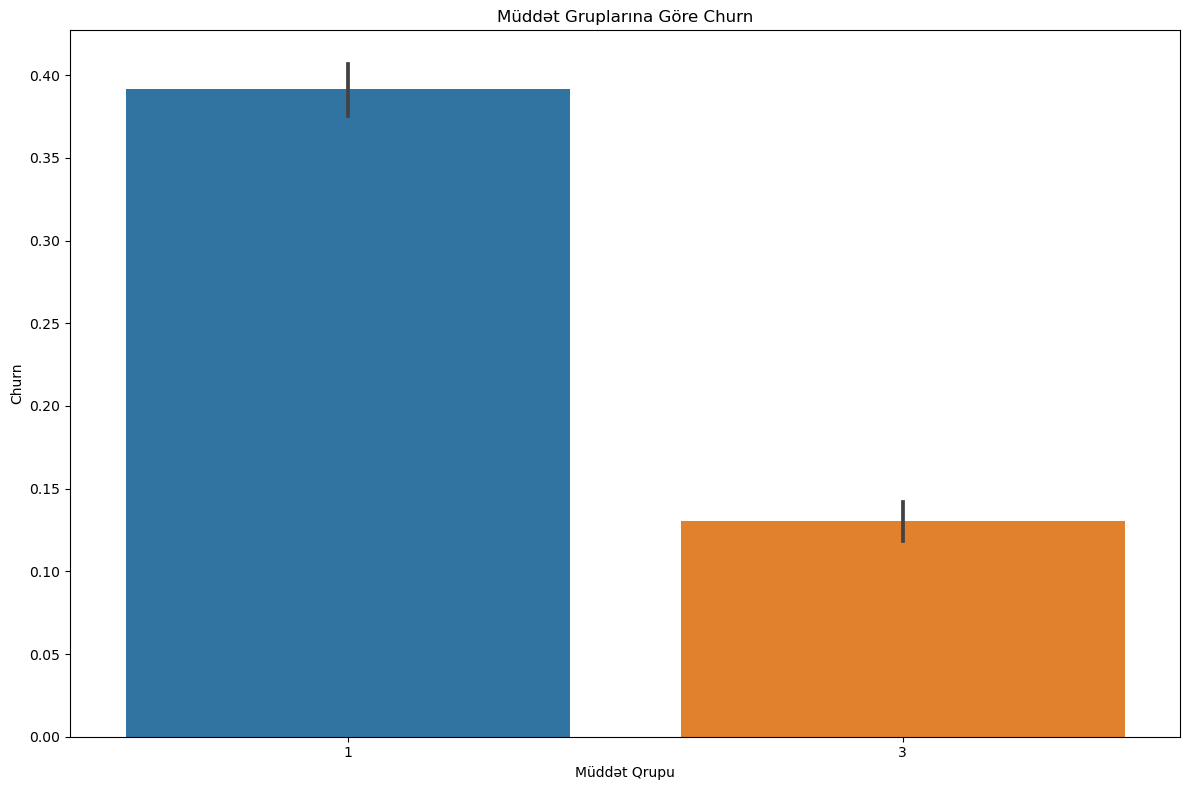

In [35]:
df['müddət_ay'] = pd.cut(df['müddəti'], bins = [0, 30, 90], labels = ['1', '3'], include_lowest = True)

plt.figure(figsize=(12,8))
sns.barplot(data = df, x = 'müddət_ay', y = 'churn')
plt.title('Müddət Gruplarına Göre Churn')
plt.xlabel('Müddət Qrupu')
plt.ylabel('Churn')
plt.tight_layout()
plt.show()

In [36]:
df['müddət_ay'] = df['müddət_ay'].astype(int)

In [37]:
df.müddət_ay.value_counts()

müddət_ay
1    3641
3    3402
Name: count, dtype: int64

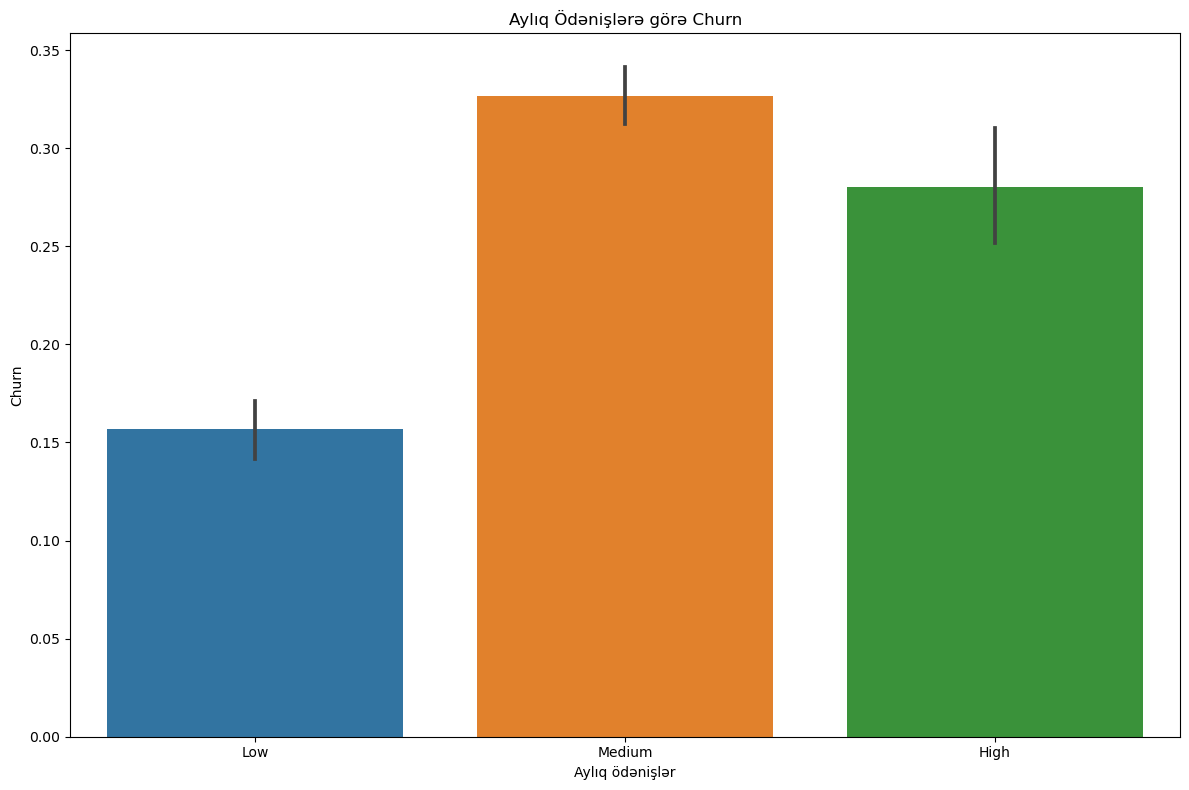

In [38]:
df['gp_aylıq_ödənişlər'] = pd.cut(df.aylıq_ödənişlər, bins = [18, 50, 100, 120], labels = ['Low', 'Medium', 'High'])

plt.figure(figsize = (12,8))
sns.barplot(data = df, x = 'gp_aylıq_ödənişlər', y = 'churn')
plt.title('Aylıq Ödənişlərə görə Churn')
plt.xlabel('Aylıq ödənişlər')
plt.ylabel('Churn')
plt.tight_layout()
plt.show()

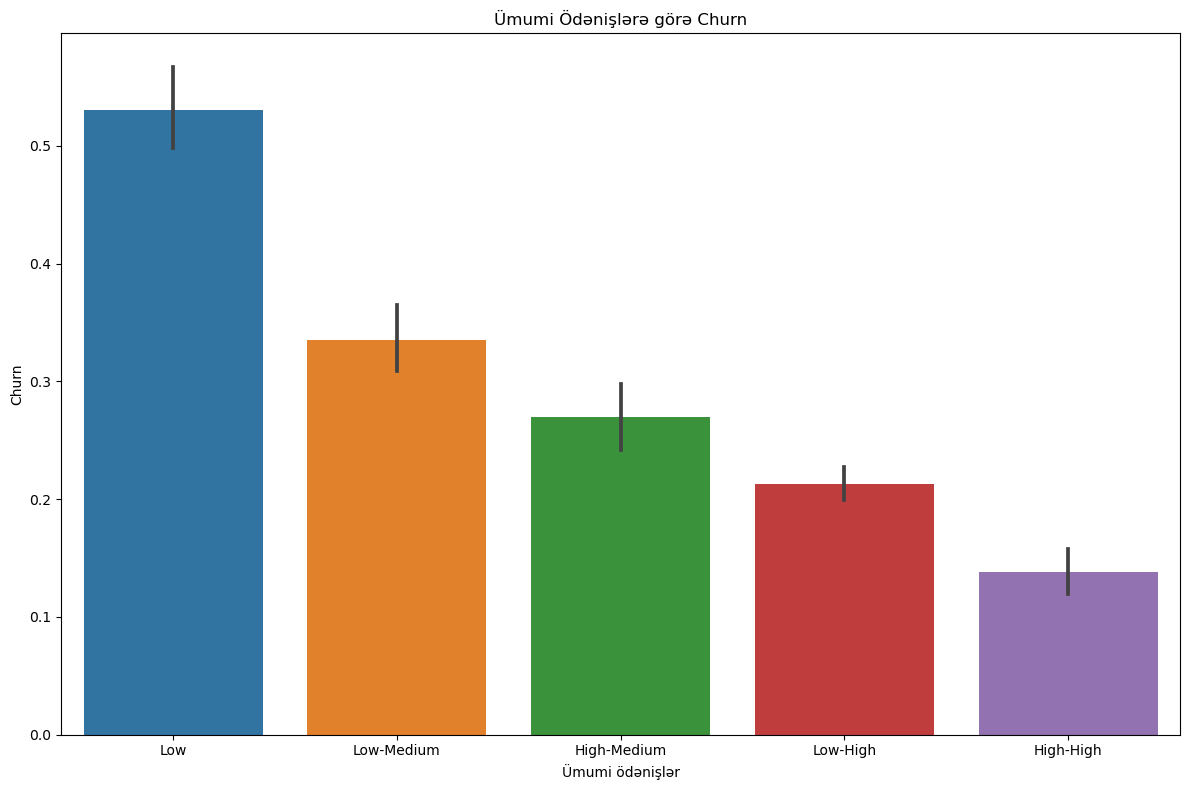

In [39]:
df['gp_ümumi_ödənişlər'] = pd.cut(df.ümumi_ödənişlər, bins = [18, 100, 500, 1000, 5000, 9000], labels = ['Low', 'Low-Medium', 'High-Medium', 'Low-High', 'High-High'])

plt.figure(figsize = (12,8))
sns.barplot(data = df, x = 'gp_ümumi_ödənişlər', y = 'churn')
plt.title('Ümumi Ödənişlərə görə Churn')
plt.xlabel('Ümumi ödənişlər')
plt.ylabel('Churn')
plt.tight_layout()
plt.show()

In [40]:
df.drop(['aylıq_ödənişlər', 'ümumi_ödənişlər'], axis=1, inplace=True)
df[['gp_aylıq_ödənişlər', 'gp_ümumi_ödənişlər']] = df[['gp_aylıq_ödənişlər', 'gp_ümumi_ödənişlər']].astype(str)
df.head()

,cinsiyyət,yaşlı_təbəqə,tərəfdaş,asılı_olanlar,müddəti,telefon_xidməti,birdən_çox_xətt,i̇nternet_servisi,onlayn_təhlükəsizlik,onlayn_yedəkləmə,cihazın_mühafizəsi,texniki_dəstək,canli_tv,filmlər,müqavilə,kağızsız_hesablaşma,ödəniş_metodu,churn,müddət_ay,gp_aylıq_ödənişlər,gp_ümumi_ödənişlər
0,Qadın,0,Hə,Yox,1,Yox,Teleon xidmeti yoxdur,DSL,Yox,Hə,Yox,Yox,Yox,Yox,ayliq,Hə,elektronik cek,0,1,Low,Low
1,Kişi,0,Yox,Yox,34,Hə,Yox,DSL,Hə,Yox,Hə,Yox,Yox,Yox,illik,Yox,mail cek,0,3,Medium,Low-High
2,Kişi,0,Yox,Yox,2,Hə,Yox,DSL,Hə,Hə,Yox,Yox,Yox,Yox,ayliq,Hə,mail cek,1,1,Medium,Low-Medium
3,Kişi,0,Yox,Yox,45,Yox,Teleon xidmeti yoxdur,DSL,Hə,Yox,Hə,Hə,Yox,Yox,illik,Yox,bank transfer,0,3,Low,Low-High
4,Kişi,0,Yox,Yox,2,Hə,Yox,Fiber optic,Yox,Yox,Yox,Yox,Yox,Yox,ayliq,Hə,elektronik cek,1,1,Medium,Low-Medium


In [41]:
df.to_csv('cleaned_churn.csv', index = False)

In [42]:
df.shape

(7043, 21)

In [43]:
# encoding categorical columns

from sklearn.preprocessing import LabelEncoder

def label_encode_col(data, columns):
    le = LabelEncoder()
    for col in columns:
        data[col] = le.fit_transform(data[col])
    return data

In [44]:
label_encode_col(df, df.drop(columns = 'churn').select_dtypes(include='object').columns)

,cinsiyyət,yaşlı_təbəqə,tərəfdaş,asılı_olanlar,müddəti,telefon_xidməti,birdən_çox_xətt,i̇nternet_servisi,onlayn_təhlükəsizlik,onlayn_yedəkləmə,cihazın_mühafizəsi,texniki_dəstək,canli_tv,filmlər,müqavilə,kağızsız_hesablaşma,ödəniş_metodu,churn,müddət_ay,gp_aylıq_ödənişlər,gp_ümumi_ödənişlər
0,1,0,0,1,1,1,1,0,2,0,2,2,2,2,1,0,1,0,1,1,2
1,0,0,1,1,34,0,2,0,0,2,0,2,2,2,2,1,3,0,3,2,3
2,0,0,1,1,2,0,2,0,0,0,2,2,2,2,1,0,3,1,1,2,4
3,0,0,1,1,45,1,1,0,0,2,0,0,2,2,2,1,0,0,3,1,3
4,0,0,1,1,2,0,2,1,2,2,2,2,2,2,1,0,1,1,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,24,0,0,0,0,2,0,0,0,0,2,0,3,0,1,2,3
7039,1,0,0,0,72,0,0,1,2,0,0,2,0,0,2,0,2,0,3,0,0
7040,1,0,0,0,11,1,1,0,0,2,2,2,2,2,1,0,1,0,1,1,4
7041,0,1,0,1,4,0,0,1,2,2,2,2,2,2,1,0,3,1,1,2,4


In [45]:
df = df.drop(columns = 'müddəti')

# Feature Selection

In [46]:
df.corr(numeric_only=True).round(2)

,cinsiyyət,yaşlı_təbəqə,tərəfdaş,asılı_olanlar,telefon_xidməti,birdən_çox_xətt,i̇nternet_servisi,onlayn_təhlükəsizlik,onlayn_yedəkləmə,cihazın_mühafizəsi,texniki_dəstək,canli_tv,filmlər,müqavilə,kağızsız_hesablaşma,ödəniş_metodu,churn,müddət_ay,gp_aylıq_ödənişlər,gp_ümumi_ödənişlər
cinsiyyət,1.00,0.00,-0.00,0.01,-0.01,-0.01,0.00,-0.02,-0.01,0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.02,0.01,-0.00,0.00,-0.00
yaşlı_təbəqə,0.00,1.00,-0.01,0.21,-0.01,-0.15,-0.03,0.13,0.01,0.02,0.15,-0.03,-0.05,0.05,-0.16,-0.12,0.15,0.02,0.02,-0.04
tərəfdaş,-0.00,-0.01,1.00,0.45,0.02,0.14,-0.00,0.15,0.15,0.16,0.13,0.13,0.13,0.11,-0.01,0.09,0.15,-0.32,0.06,0.15
asılı_olanlar,0.01,0.21,0.45,1.00,-0.00,-0.02,-0.04,0.15,0.09,0.08,0.13,0.05,0.02,0.09,-0.11,-0.05,0.16,-0.13,0.04,0.02
telefon_xidməti,-0.01,-0.01,0.02,-0.00,1.00,-0.02,-0.39,-0.02,0.02,0.00,-0.02,0.06,0.04,0.00,0.02,0.01,-0.01,-0.00,-0.07,0.11
birdən_çox_xətt,-0.01,-0.15,0.14,-0.02,-0.02,1.00,0.11,0.01,0.12,0.12,0.01,0.18,0.18,0.07,0.17,0.19,-0.04,-0.29,0.10,0.23
i̇nternet_servisi,0.00,-0.03,-0.00,-0.04,-0.39,0.11,1.00,0.03,-0.04,-0.04,0.03,-0.11,-0.10,-0.07,0.14,0.11,-0.05,-0.02,-0.35,0.02
onlayn_təhlükəsizlik,-0.02,0.13,0.15,0.15,-0.02,0.01,0.03,1.00,0.19,0.18,0.29,0.04,0.06,0.12,-0.16,-0.06,0.29,-0.27,0.10,0.13
onlayn_yedəkləmə,-0.01,0.01,0.15,0.09,0.02,0.12,-0.04,0.19,1.00,0.19,0.20,0.15,0.14,0.08,-0.01,0.03,0.20,-0.32,0.17,0.20
cihazın_mühafizəsi,0.00,0.02,0.16,0.08,0.00,0.12,-0.04,0.18,0.19,1.00,0.24,0.28,0.29,0.10,-0.04,0.03,0.18,-0.32,0.23,0.21


In [47]:
# Dropping weak correlated columns

correlations = df.corr(numeric_only=True)['churn'].drop('churn')

weak_features = correlations[correlations.abs() < 0.1].index.tolist()

df = df.drop(columns=weak_features)

df.head()


,yaşlı_təbəqə,tərəfdaş,asılı_olanlar,onlayn_təhlükəsizlik,onlayn_yedəkləmə,cihazın_mühafizəsi,texniki_dəstək,kağızsız_hesablaşma,churn,müddət_ay,gp_aylıq_ödənişlər
0,0,0,1,2,0,2,2,0,0,1,1
1,0,1,1,0,2,0,2,1,0,3,2
2,0,1,1,0,0,2,2,0,1,1,2
3,0,1,1,0,2,0,0,1,0,3,1
4,0,1,1,2,2,2,2,0,1,1,2


In [48]:
df.shape

(7043, 11)

In [49]:
df['churn'].value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

# Model Building, Model Optimization

# Train-Test Split

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer

df_cleaned = df.dropna()

X = df_cleaned.drop('churn', axis = 1)
y = df_cleaned['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(sampling_strategy = 'auto', k_neighbors = 5, random_state = 14)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Model Selection

In [51]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression


lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print(f"Logistic Regression: \n {classification_report(y_test, y_pred_lr)}")

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1062
           1       0.56      0.42      0.48       347

    accuracy                           0.77      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409



In [52]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print(f"Decision Tree:\n {classification_report(y_test, y_pred_dt)}")

Decision Tree:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1062
           1       0.52      0.50      0.51       347

    accuracy                           0.76      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.76      0.76      0.76      1409



In [53]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7551
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1062
           1       0.50      0.53      0.52       347

    accuracy                           0.76      1409
   macro avg       0.67      0.68      0.68      1409
weighted avg       0.76      0.76      0.76      1409



In [54]:
# XGBoost Classifier

from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print(f"XGBoost:\n{classification_report(y_test, y_pred_xgb)}")

XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1062
           1       0.52      0.52      0.52       347

    accuracy                           0.76      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.76      0.76      0.76      1409



In [55]:
# Support Vector Machine (SVM)

from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print(f"SVM: \n{classification_report(y_test, y_pred_svm)}")

SVM: 
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1062
           1       0.55      0.51      0.53       347

    accuracy                           0.78      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.77      0.78      0.77      1409



# Compare Model Performance

In [58]:
print("Accuracy Scores:")
print(f'Logistic Regression: {round(accuracy_score(y_test, y_pred_lr), 2)}')
print(f'Decision Tree:       {round(accuracy_score(y_test, y_pred_dt), 2)}')
print(f'Random Forest:       {round(accuracy_score(y_test, y_pred_rf), 2)}')
print(f'XGBoost:             {round(accuracy_score(y_test, y_pred_xgb),2)}')
print(f'SVM:                 {round(accuracy_score(y_test, y_pred_svm),2)}')

Accuracy Scores:
Logistic Regression: 0.77
Decision Tree:       0.76
Random Forest:       0.76
XGBoost:             0.76
SVM:                 0.78


# Evaluation: ROC-AUC, Confusion Matrix

In [59]:
lr.fit(X_train_scaled, y_train)
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]

In [60]:
# Predict probabilities
lr_probs = lr.predict_proba(X_test_scaled)[:,1]
svm_probs = svm.predict_proba(X_test_scaled)[:,1]

# Predict labels
lr_preds = lr.predict(X_test_scaled)
svm_preds = svm.predict(X_test_scaled)

#AUC Scores
print(f"Logistic Regression AUC: {roc_auc_score(y_test, lr_probs).round(2)}")
print(f"SVM AUC: {roc_auc_score(y_test, svm_probs).round(2)}")

# Confusion Matrices
print("\nConfusion Matrix - Logistic Regression:")
print(confusion_matrix(y_test, lr_preds))

print("\nConfusion Matrix - SVM:")
print(confusion_matrix(y_test, svm_preds))

# Classification Reports
print("\nLogistic Regression Report:")
print(classification_report(y_test, lr_preds))

print("\nSVM Report:")
print(classification_report(y_test, svm_preds))

Logistic Regression AUC: 0.8
SVM AUC: 0.75

Confusion Matrix - Logistic Regression:
[[945 117]
 [201 146]]

Confusion Matrix - SVM:
[[920 142]
 [171 176]]

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1062
           1       0.56      0.42      0.48       347

    accuracy                           0.77      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409


SVM Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1062
           1       0.55      0.51      0.53       347

    accuracy                           0.78      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.77      0.78      0.77      1409



# Plot ROC Curves

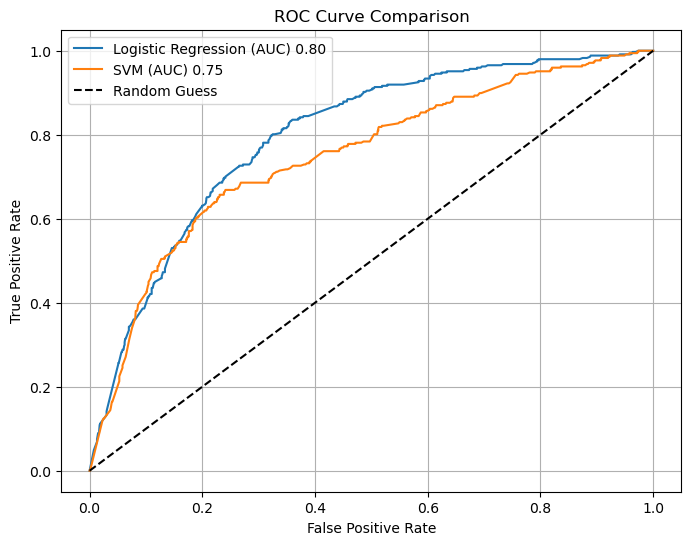

In [61]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label = f'Logistic Regression (AUC) {roc_auc_score(y_test, lr_probs):.2f}')
plt.plot(fpr_svm, tpr_svm, label = f'SVM (AUC) {roc_auc_score(y_test, svm_probs):.2f}')
plt.plot([0,1], [0,1], 'k--', label = 'Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Improving model performance

# Catboost + Smote

In [62]:
from collections import Counter

counter = Counter(y_train)

class_0_weight = counter[1] / counter[0]
class_1_weight = 0

class_weights = [class_0_weight, class_1_weight]

In [63]:
np.round(class_weights, 2)

array([0.37, 0.  ])

In [64]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(
        iterations = 500,
        learning_rate = 0.1,
        depth = 6,
        eval_metric = 'F1',
        class_weights = [1, 5],
        random_seed = 42,
        verbose = 100
)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 14)

In [65]:
model.fit(X_train, y_train, eval_set = (X_val, y_val))

0:	learn: 0.8229936	test: 0.8111793	best: 0.8111793 (0)	total: 216ms	remaining: 1m 47s
100:	learn: 0.8571207	test: 0.7856145	best: 0.8150366 (3)	total: 493ms	remaining: 1.95s
200:	learn: 0.8652954	test: 0.7689594	best: 0.8150366 (3)	total: 785ms	remaining: 1.17s
300:	learn: 0.8702740	test: 0.7692308	best: 0.8150366 (3)	total: 1.07s	remaining: 706ms
400:	learn: 0.8712856	test: 0.7673179	best: 0.8150366 (3)	total: 1.36s	remaining: 337ms
499:	learn: 0.8725976	test: 0.7648524	best: 0.8150366 (3)	total: 1.69s	remaining: 0us

bestTest = 0.8150365935
bestIteration = 3

Shrink model to first 4 iterations.


In [69]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.95      0.44      0.60      1062
           1       0.35      0.93      0.51       347

    accuracy                           0.56      1409
   macro avg       0.65      0.68      0.55      1409
weighted avg       0.80      0.56      0.57      1409



In [70]:
##Lower the Decision Threshold (very effective)

y_proba = model.predict_proba(X_test)[:, 1]
y_pred_custom = (y_proba >= 0.3).astype(int)


print(classification_report(y_test, y_pred_custom, digits = 3))

              precision    recall  f1-score   support

           0      0.979     0.130     0.229      1062
           1      0.271     0.991     0.426       347

    accuracy                          0.342      1409
   macro avg      0.625     0.561     0.328      1409
weighted avg      0.805     0.342     0.278      1409



In [71]:
#(Optional) Combine SMOTE + Class Weights

sm = SMOTE(random_state=14)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

model = CatBoostClassifier(
    iterations = 500,
    learning_rate = 0.1,
    depth = 6,
    eval_metric = 'F1',
    class_weights = [1, 3],
    random_seed = 42,
    verbose = 100
    
)

model.fit(X_train_smote, y_train_smote, eval_set = (X_val, y_val))

0:	learn: 0.8751403	test: 0.7345845	best: 0.7345845 (0)	total: 5.96ms	remaining: 2.97s
100:	learn: 0.9024531	test: 0.7240861	best: 0.7500000 (11)	total: 508ms	remaining: 2.01s
200:	learn: 0.9057587	test: 0.7171923	best: 0.7500000 (11)	total: 1s	remaining: 1.49s
300:	learn: 0.9068149	test: 0.7029805	best: 0.7500000 (11)	total: 1.41s	remaining: 935ms
400:	learn: 0.9084568	test: 0.7047913	best: 0.7500000 (11)	total: 1.86s	remaining: 460ms
499:	learn: 0.9096456	test: 0.7053340	best: 0.7500000 (11)	total: 2.38s	remaining: 0us

bestTest = 0.75
bestIteration = 11

Shrink model to first 12 iterations.


In [72]:
y_pred_smote = model.predict(X_test)

print(classification_report(y_test, y_pred_smote, digits = 3))

              precision    recall  f1-score   support

           0      0.947     0.436     0.597      1062
           1      0.349     0.925     0.507       347

    accuracy                          0.556      1409
   macro avg      0.648     0.681     0.552      1409
weighted avg      0.800     0.556     0.575      1409



In [74]:
#Even with a better model, it may still favor class 0 by default. 
#Let’s manually adjust the threshold and evaluate how performance changes.

y_proba = model.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred = (y_proba >= threshold).astype(int)

print(f"Threshold = {threshold}")
print(classification_report(y_test, y_pred, digits = 2))

Threshold = 0.3
              precision    recall  f1-score   support

           0       0.98      0.13      0.23      1062
           1       0.27      0.99      0.43       347

    accuracy                           0.34      1409
   macro avg       0.63      0.56      0.33      1409
weighted avg       0.80      0.34      0.28      1409



In [78]:
# Bonus: Find the Best Threshold Automatically

best_f1 = 0
best_threshold = 0

for t in np.arange(0.1, 0.9, 0.05):
    y_pred = (y_proba >= t).astype(int)
    score = f1_score(y_test, y_pred)
    if score > best_f1:
        best_f1 = score
        best_threshold = t
        
        
print(f"Best threshold: {best_threshold:.2f}, Best F1-score: {best_f1:.2f}")
    

Best threshold: 0.65, Best F1-score: 0.58


In [79]:
y_pred_final = (y_proba >= 0.75).astype(int)

print(classification_report(y_test, y_pred_final, digits = 2))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1062
           1       0.49      0.67      0.57       347

    accuracy                           0.75      1409
   macro avg       0.68      0.72      0.70      1409
weighted avg       0.78      0.75      0.76      1409



# Plot a Precision-Recall Curve


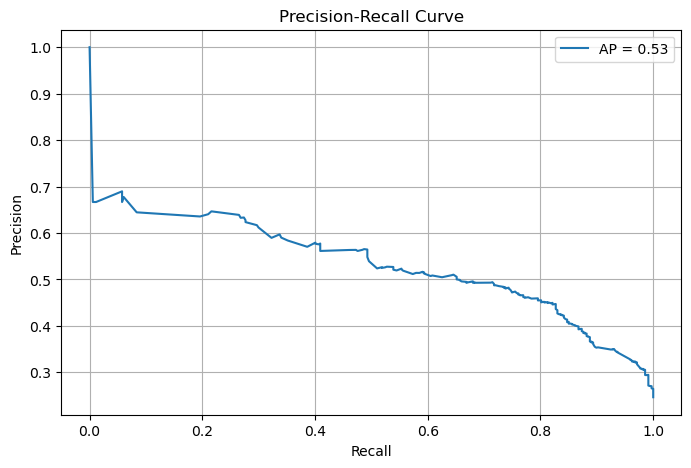

In [81]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
ap_score = average_precision_score(y_test, y_proba)

plt.figure(figsize = (8, 5))
plt.plot(recall, precision, label = f"AP = {ap_score:.2f}")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [83]:
model.get_feature_importance(prettified = True).round(2)

,Feature Id,Importances
0,müddət_ay,23.46
1,onlayn_təhlükəsizlik,18.35
2,texniki_dəstək,15.85
3,kağızsız_hesablaşma,13.59
4,gp_aylıq_ödənişlər,8.90
5,onlayn_yedəkləmə,8.63
6,cihazın_mühafizəsi,8.08
7,tərəfdaş,1.69
8,yaşlı_təbəqə,1.44
9,asılı_olanlar,0.00


# CatBoost + SKF + Smote

In [84]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 14)
model = CatBoostClassifier(verbose = 0, random_state = 14)

best_model = None
best_f1_weighted = 0
best_report = ""

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold+1}")
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    smote = SMOTE(random_state=14)
    
    X_train_smt, y_train_smt = smote.fit_resample(X_train, y_train)
    
    model.fit(X_train_smt, y_train_smt)
    
    y_pred = model.predict(X_test)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(classification_report(y_test, y_pred))


Fold 1
Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.87      0.71      0.78      1035
           1       0.47      0.71      0.56       374

    accuracy                           0.71      1409
   macro avg       0.67      0.71      0.67      1409
weighted avg       0.76      0.71      0.72      1409


Fold 2
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1035
           1       0.51      0.71      0.60       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409


Fold 3
Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1035
           1       0.51      0.72      0.60       374

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weigh

# Manual improving metrics

In [85]:
df.shape

(7043, 11)

In [86]:
churn1 = df[df['churn'] == 1]
churn0 = df[df['churn'] == 0]

In [87]:
churn1.shape

(1869, 11)

In [88]:
churn0.shape

(5174, 11)

In [89]:
7043 * 0.3

2112.9

In [90]:
# test0 --> 1000
# test1 --> 1100

In [91]:
test1 = churn1.loc[:4000]
train1 = churn1.loc[4001:]

In [92]:
test0 = churn0.loc[:1400]
train0 = churn0.loc[1401:]

In [93]:
test1.shape

(1057, 11)

In [94]:
test0.shape

(1031, 11)

In [95]:
train_data = pd.concat([train1, train0])
test_data = pd.concat([test1, test0])

In [96]:
train_data.shape

(4955, 11)

In [97]:
test_data.shape

(2088, 11)

In [98]:
x_test = test_data.drop(columns = 'churn')
y_test = test_data['churn']

In [99]:
x_train = train_data.drop(columns = 'churn')
y_train = train_data['churn']

In [100]:
y_train.value_counts()

churn
0    4143
1     812
Name: count, dtype: int64

In [101]:
y_test.value_counts()

churn
1    1057
0    1031
Name: count, dtype: int64

In [102]:
smote = SMOTE(random_state = 14, sampling_strategy = 1.0)

x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

In [103]:
y_train_sm.value_counts()

churn
1    4143
0    4143
Name: count, dtype: int64

In [104]:
models = {
    'Logistic Regression' : LogisticRegression(class_weight = 'balanced', max_iter = 1000),
    'Random Forest' : RandomForestClassifier(class_weight = 'balanced', random_state = 14),
    'Gradient Boosting' : GradientBoostingClassifier(random_state = 14),
    'Decision Tree' : DecisionTreeClassifier(class_weight = 'balanced', random_state = 14),
    'Naive Bayes' : GaussianNB(),
    'Support Vector Machine' : SVC(class_weight = 'balanced', probability = True, random_state = 14),
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Balanced Random Forest' : BalancedRandomForestClassifier(random_state = 14),
    'Easy Ensemble' : EasyEnsembleClassifier(random_state = 14),
    'Balanced Bagging' : BalancedBaggingClassifier(random_state = 14)
} 

In [105]:
for name, model in models.items():
    print(f"\n Model: {name}")
    
    pipeline = imPipeline([('model', model)])
    
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    
    f1 = classification_report(y_test, y_pred)
    print(f1)


 Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1031
           1       0.73      0.74      0.74      1057

    accuracy                           0.73      2088
   macro avg       0.73      0.73      0.73      2088
weighted avg       0.73      0.73      0.73      2088


 Model: Random Forest
              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1031
           1       0.74      0.67      0.70      1057

    accuracy                           0.71      2088
   macro avg       0.71      0.71      0.71      2088
weighted avg       0.71      0.71      0.71      2088


 Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.55      0.96      0.70      1031
           1       0.86      0.22      0.36      1057

    accuracy                           0.59      2088
   macro avg       0.70      0.59      0.53      

In [118]:
import json

best_f1_score_weighted = -1
best_model_name = None
best_model_params = None
best_model_report = None # To store the entire report dictionary for the best model
best_model_y_pred = None # To store predictions of the best model to regenerate report string

print("--- Starting Model Training and Evaluation ---")

for name, model in models.items():
    # We won't print individual model reports here, just indicate progress
    print(f"Processing Model: {name}...") 

    pipeline = imPipeline([('model', model)])
    
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    
    # Get the classification report as a dictionary to extract metrics
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract the weighted average F1-score for comparison
    current_f1_weighted = report_dict['weighted avg']['f1-score']
    
    # Check if this model is the best so far
    if current_f1_weighted > best_f1_score_weighted:
        best_f1_score_weighted = current_f1_weighted
        best_model_name = name
        best_model_report = report_dict # Store the full report dictionary
        best_model_y_pred = y_pred # Store y_pred to regenerate the formatted report string later
        
        # Get the parameters of the model within the pipeline
        model_params_full = pipeline.get_params()
        best_model_params = {
            k.replace('model__', ''): v
            for k, v in model_params_full.items()
            if k.startswith('model__')
        }

print("\n" + "="*50)
print("             BEST PERFORMING MODEL             ")
print("="*50)

if best_model_name:
    print(f"\nModel Name: {best_model_name}")
    print(f"Weighted Avg F1-score: {best_f1_score_weighted:.4f}")
    
    print("\n--- Parameters of the Best Model ---")
    print(json.dumps(best_model_params, indent=4))
    
    print("\n--- Full Classification Report for the Best Model ---")
    # Regenerate the string format of the classification report for familiar look
    print(classification_report(y_test, best_model_y_pred))

else:
    print("No models were processed or evaluated.")

print("\n" + "="*50)

--- Starting Model Training and Evaluation ---
Processing Model: Logistic Regression...
Processing Model: Random Forest...
Processing Model: Gradient Boosting...
Processing Model: Decision Tree...
Processing Model: Naive Bayes...
Processing Model: Support Vector Machine...
Processing Model: K-Nearest Neighbors...
Processing Model: Balanced Random Forest...
Processing Model: Easy Ensemble...
Processing Model: Balanced Bagging...

             BEST PERFORMING MODEL             

Model Name: Easy Ensemble
Weighted Avg F1-score: 0.7425

--- Parameters of the Best Model ---
{
    "estimator": null,
    "n_estimators": 10,
    "n_jobs": null,
    "random_state": 14,
    "replacement": false,
    "sampling_strategy": "auto",
    "verbose": 0,
    "warm_start": false
}

--- Full Classification Report for the Best Model ---
              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1031
           1       0.73      0.78      0.75      1057

    accur